In [1]:
import os
import numpy as np

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
MY_LABEL_MAP_NAME = 'vehicles_label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'MY_ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations_z_strani'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME),
    'MY_LABELMAP': os.path.join(paths['MY_ANNOTATION_PATH'], MY_LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [55]:
!git config --system core.longpaths true

In [56]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [57]:
gzip -dc protoc-3.15.6-win64.zip | tar -xf -

SyntaxError: invalid syntax (3485578461.py, line 1)

In [7]:
print(paths['PROTOC_PATH'])

Tensorflow\protoc


In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    print("1")
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    print("2")
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    print("3")
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
1
2


tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


^C
3
^C


In [ ]:
!python --version

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

^C


In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip list

In [7]:
import object_detection

In [8]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [9]:
labels = [{'name':'Vehicle', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [10]:
print(files['LABELMAP'])

Tensorflow\workspace\annotations\label_map.pbtxt


# 3. Create TF records

In [14]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [15]:
files['TF_RECORD_SCRIPT']

'Tensorflow\\scripts\\generate_tfrecord.py'

In [16]:
paths['SCRIPTS_PATH']

'Tensorflow\\scripts'

In [17]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\matij\onedrive\documents\sola\feri\5. semester\uvod v racunalniski vid in razpoznavanje vzorcev\projekt\tenserflow object detection\tfodcourse\tfod\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: tensorflow-text, tf-models-official


In [18]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [11]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [13]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [14]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [15]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]
#pipeline_config.train_input_reader.label_map_path= files['MY_LABELMAP']
#pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['MY_ANNOTATION_PATH'], 'vehicles_train.tfrecord')]
#pipeline_config.eval_input_reader[0].label_map_path = files['MY_LABELMAP']
#pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['MY_ANNOTATION_PATH'], 'vehicles_test.tfrecord')]

In [16]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

# 6. Train the model

In [17]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [18]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=6000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [19]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=6000


# 7. Evaluate the Model

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'], files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


# 8. Load Train Model From Checkpoint

In [22]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [23]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [24]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config'

# 9. Detect from an Image

In [25]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [27]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'Custom Tests', 'bemfa.jpeg')

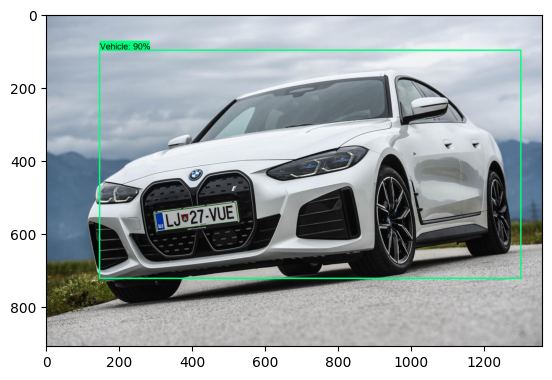

In [28]:
img = cv2.imread(IMAGE_PATH)
#img = images[50]
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
num_detections

In [ ]:
dataset = tf.data.TFRecordDataset([os.path.join(paths['MY_ANNOTATION_PATH'], 'vehicles_train.tfrecord')], compression_type='')


for raw_record in dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

In [25]:


def extract_fn(data_record):
    features = {
        # Extract features using the keys set during creation
        "image/class/label":    tf.io.FixedLenFeature([], tf.int64),
        "image/encoded":        tf.io.VarLenFeature(tf.string),
    }
    sample = tf.io.parse_single_example(data_record, features)
    image = tf.image.decode_image(sample['image/encoded'], dtype=tf.float32) 
    label = sample['image/class/label']
    return image, label



In [39]:
path_ = os.path.join(paths['MY_ANNOTATION_PATH'], 'vehicles_train.tfrecord')
og_path = os.path.join(paths['ANNOTATION_PATH'], 'train.record')

In [40]:
i = 0
for str_rec in tf.compat.v1.python_io.tf_record_iterator(path_):
    example = tf.train.Example()
    example.ParseFromString(str_rec)
    print(i,": ", dict(example.features.feature).keys(), "\n")
    i+=1

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
0 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

1 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

2 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

3 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 

666 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

667 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

668 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin', 'image/encoded', 'image/object/bbox/xmax']) 

669 :  dict_keys(['image/width', 'image/filename', 'image/height', 'image/format', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/ymax', 'image/object/class/text', 'image/object/bbox/xmin'

In [41]:
i = 0
for str_rec in tf.compat.v1.python_io.tf_record_iterator(og_path):
    example = tf.train.Example()
    example.ParseFromString(str_rec)
    print(i,": ", dict(example.features.feature).keys(), "\n")
    i+=1

0 :  dict_keys(['image/width', 'image/height', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/class/text', 'image/object/bbox/xmin', 'image/source_id', 'image/object/bbox/xmax', 'image/filename', 'image/format', 'image/object/bbox/ymax', 'image/encoded']) 

1 :  dict_keys(['image/width', 'image/height', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/xmin', 'image/object/class/text', 'image/source_id', 'image/object/bbox/xmax', 'image/filename', 'image/format', 'image/object/bbox/ymax', 'image/encoded']) 

2 :  dict_keys(['image/width', 'image/height', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/class/text', 'image/object/bbox/xmin', 'image/source_id', 'image/object/bbox/xmax', 'image/filename', 'image/format', 'image/object/bbox/ymax', 'image/encoded']) 

3 :  dict_keys(['image/width', 'image/height', 'image/object/bbox/ymin', 'image/object/class/label', 'image/object/bbox/xmin', 'image/object/class/text', 'image/so

In [42]:
images = []
for str_rec in tf.compat.v1.python_io.tf_record_iterator(path_):
    example = tf.train.Example()
    example.ParseFromString(str_rec)
    #print(dict(example.features.feature).keys())
    encoded_image = example.features.feature['image/encoded'].bytes_list.value[0]
    image = tf.image.decode_jpeg(encoded_image)
    image = np.array(image)
    images.append(image)
images = np.array(images)

In [43]:
images.shape

(878, 416, 416, 3)

In [ ]:
value = example.features.feature['image/encoded'].get()

In [ ]:
plt.imshow(images[7])

In [88]:
img = cv2.imread(IMAGE_PATH)
#img = images[50]
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
image, shapes = detection_model.preprocess(input_tensor)
#prediction_dict = detection_model.predict(image)

In [89]:
shapes

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[320, 320,   3]])>

In [92]:
detection_model.build(shapes)

In [96]:
detection_model.build(input_shape=shapes)
_ = detection_model.predict(image, shapes)
converter = tf.lite.TFLiteConverter.from_keras_model(detection_model)
tflite_model = converter.convert()
with open("model.tflite", 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\matij\AppData\Local\Temp\tmprm4uq0re\assets


INFO:tensorflow:Assets written to: C:\Users\matij\AppData\Local\Temp\tmprm4uq0re\assets


ValueError: Model <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x0000019637654700> cannot be saved because the input shapes have not been set. Usually, input shapes are automatically determined from calling `.fit()` or `.predict()`. To manually set the shapes, call `model.build(input_shape)`.

# 10. Freezing the Graph

In [29]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [30]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [31]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [32]:
!{command}

2023-01-14 19:17:45.985610: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 19:17:46.817046: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4384 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0114 19:17:49.440251 34560 deprecation.py:623] From C:\Users\matij\OneDrive\Documents\Sola\FERI\5. semester\Uvod v racunalniski vid in razpoznavanje vzorcev\Pro

# 11. Conversion to TFJS

In [33]:
#!pip install tensorflowjs

In [34]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [35]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [36]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2023-01-14 19:19:00.288177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 19:19:01.022346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4632 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-01-14 19:19:15.982498: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-01-14 19:19:15.983359: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
2023-01-14 19:19:15.987740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 wi

# 12. Conversion to TFLite

In [37]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [38]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [39]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [40]:
!{command}

2023-01-14 19:19:50.729312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 19:19:51.459828: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4632 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-01-14 19:20:01.620784: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4632 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-01-14 19:20:01.667650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enable

In [41]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [42]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [43]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [44]:
!{command}

Estimated count of arithmetic ops: 1.698 G  ops, equivalently 0.849 G  MACs


2023-01-14 19:20:51.798467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-14 19:20:52.503761: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4632 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
2023-01-14 19:21:08.818503: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-14 19:21:08.818533: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-14 19:21:08.821755: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: Tensorflow\workspace\models\my_ssd_mobnet\tf